# Introduction to Convolutional Neural  Networks and Computer Vision with Tensorflow 

Computer Vision is the practise of writing algorithms which can discover patterns in visual data.Such as the camera of a self-driviingcar recogniziing thecar in front

## Get the data  

The images we're working with are form the food101 dataset (link:https://www.kaggle.com/datasets/dansbecker/food-101)

However we've modified it to only use two classes(pizza 🍕 & steak 🥩)using the image data modification 

In [1]:
import tensorflow as tf 
tf.device("GPU")

In [2]:
import zipfile
import wget # type: ignore

# url  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#  run this code cell for only one time 
# url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
# downloaded_file = wget.download(url)

# Unzip the downloaded file 
zip_ref =zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)
A very crucial stepat the beginning of any machine learning project is becoming one with the data.
and for a computer vison project this usually means visualzing many samples of your data.

In [3]:
!dir pizza_steak

 Volume in drive C has no label.
 Volume Serial Number is FCFE-0C95

 Directory of c:\Users\admin\Desktop\programming\deep Learning\pizza_steak

05/20/2024  08:44 PM    <DIR>          .
05/31/2024  06:08 PM    <DIR>          ..
05/20/2024  08:39 PM    <DIR>          pizza_steak
05/20/2024  08:44 PM    <DIR>          test
05/20/2024  08:44 PM    <DIR>          train
               0 File(s)              0 bytes
               5 Dir(s)  51,279,826,944 bytes free


In [4]:
# !dir pizza_steak/train/steak/ # type: ignore

In [5]:
import os 
# Walk through pizza_steak directory and list number of files

for dirpath ,dirnames,filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 3 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak\pizza_steak.
There are 2 directories and 0 images in pizza_steak\pizza_steak\test.
There are 0 directories and 250 images in pizza_steak\pizza_steak\test\pizza.
There are 0 directories and 250 images in pizza_steak\pizza_steak\test\steak.
There are 2 directories and 0 images in pizza_steak\pizza_steak\train.
There are 0 directories and 750 images in pizza_steak\pizza_steak\train\pizza.
There are 0 directories and 750 images in pizza_steak\pizza_steak\train\steak.
There are 2 directories and 0 images in pizza_steak\test.
There are 0 directories and 250 images in pizza_steak\test\pizza.
There are 0 directories and 250 images in pizza_steak\test\steak.
There are 2 directories and 0 images in pizza_steak\train.
There are 0 directories and 750 images in pizza_steak\train\pizza.
There are 0 directories and 750 images in pizza_steak\train\steak.


In [6]:
# Another way to find out how many images are in file
num_steak_images= len(os.listdir('pizza_steak/train/steak'))
num_steak_images

750

To visualze our images , first lets get the class names programmatically

In [7]:
# Get the class names programmatically 

import pathlib 
import numpy as np # type: ignore

data_dir =pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
# Lets visualize our images

import matplotlib.pyplot as plt  # type: ignore
import matplotlib.image as mpimg # type: ignore
import random

def view_random_image(target_dir,target_class):
    # Setup the target directory 
    target_folder = target_dir + target_class

    # get a random image path 
    random_image = random.sample(os.listdir(target_folder),1)

    # Read in the image an plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}') # shows the shape of the images
    return img 

Image shape: (512, 384, 3)


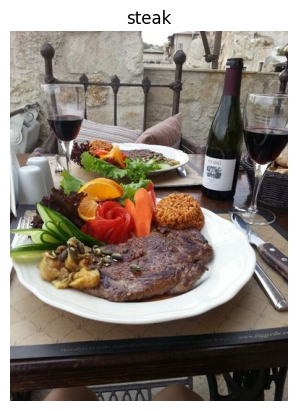

In [9]:
# view a random image from training dataset

img= view_random_image(target_dir='pizza_steak/train/',target_class='steak')

Image shape: (512, 512, 3)


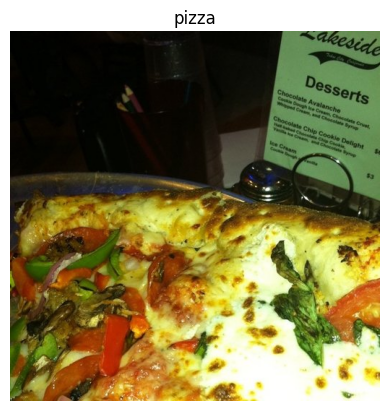

In [10]:
img= view_random_image(target_dir='pizza_steak/train/',target_class='pizza')


## An end to end example 

Lets build a convolutional neural network to find patterns in our images , more specfcally we need  way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN 
* Fit the CNN to our training data 

In [11]:
import tensorflow as tf  # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

# set the seed 
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1 also called scaling/ normalzation)
train_datagen = ImageDataGenerator(rescale  = 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir ='pizza_steak/test'
# Import data from directories and turn in into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size =(224,224),
                                               class_mode ='binary',
                                               seed =42
                                               )

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size =(224,224),
                                               class_mode ='binary',
                                               seed = 42
                                               )

#  Build a CNN model 
model_1 = tf.keras.models.Sequential([ # type: ignore
    
    tf.keras.layers.Conv2D(filters=10, # type: ignore
                        kernel_size=3,
                        activation='relu',
                        input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),# type: ignore
    tf.keras.layers.MaxPool2D(pool_size=2,# type: ignore
                            padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),# type: ignore
    tf.keras.layers.Conv2D(10,3,activation='relu'),# type: ignore
    tf.keras.layers.MaxPool2D(2),# type: ignore
    tf.keras.layers.Flatten(),# type: ignore
    tf.keras.layers.Dense(1,activation='sigmoid')# type: ignore
])

# Compile our CNN
model_1.compile(loss ='binary_crossentropy',
                optimizer =tf.keras.optimizers.Adam(),# type: ignore
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 251ms/step - loss: 0.5722 - accuracy: 0.7027 - val_loss: 0.4664 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 3s 66ms/step - loss: 0.4749 - accuracy: 0.7867 - val_loss: 0.3896 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 3s 67ms/step - loss: 0.4304 - accuracy: 0.8173 - val_loss: 0.3660 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 3s 69ms/step - loss: 0.3793 - accuracy: 0.8380 - val_loss: 0.3612 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 3s 67ms/step - loss: 0.3298 - accuracy: 0.8673 - val_loss: 0.3509 - val_accuracy: 0.8580


In [12]:
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using our model for different dataset 

Lets replicate the model we'he built in a previous section to see if it works with our image data.

The model we're building is from the [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.11037&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).


In [13]:
# Set the random seed 
tf.random.set_seed(42)

# Create a model to replace the Tensorflow Playground model
model_2 = tf.keras.Sequential([# type: ignore
    tf.keras.layers.Flatten(input_shape =(224,224,3)),# type: ignore
    tf.keras.layers.Dense(4,activation='relu'),# type: ignore
    tf.keras.layers.Dense(4,activation='relu'),# type: ignore
    tf.keras.layers.Dense(1,activation='sigmoid')# type: ignore
])

# Compile the model 
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),# type: ignore
                metrics=['accuracy'])

# fit the model 
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))




Epoch 1/5
20/47 [===========>..................] - ETA: 1s - loss: 1.0665 - accuracy: 0.5126

KeyboardInterrupt: 

In [ ]:
# model 2 summary 
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters lets try to improve it 

In [ ]:
# type: ignore# Set the random seed 
tf.random.set_seed(42)

# Create the model 
model_3 = tf.keras.Sequential([# type: ignore
    tf.keras.layers.Flatten(input_shape =(224,224,3)),# type: ignore
    tf.keras.layers.Dense(100,activation='relu'),# type: ignore
    tf.keras.layers.Dense(100,activation='relu'),# type: ignore
    tf.keras.layers.Dense(100,activation='relu'),# type: ignore
    tf.keras.layers.Dense(1,activation='sigmoid'),# type: ignore
])

# Compile the model 
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),# type: ignore
                metrics=['accuracy'])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps =len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 69ms/step - loss: 2.5549 - accuracy: 0.6140 - val_loss: 1.2052 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 3s 69ms/step - loss: 1.2682 - accuracy: 0.6847 - val_loss: 0.7396 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 3s 69ms/step - loss: 0.7735 - accuracy: 0.7347 - val_loss: 0.6478 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 3s 65ms/step - loss: 0.7181 - accuracy: 0.7360 - val_loss: 0.5086 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 3s 68ms/step - loss: 0.5909 - accuracy: 0.7707 - val_loss: 1.3461 - val_accuracy: 0.6020


In [ ]:
# summary of model 3 

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification : Lets break it down

1. Become one with the data 
2. Preprocess the data 
3. Created a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied 


### 1. Become one with the data 

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


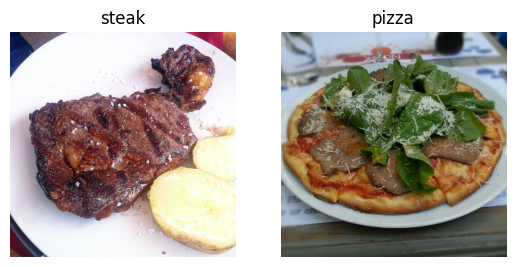

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img =view_random_image('pizza_steak/train/','pizza')

### 2. Preprocess the data 

In [ ]:
# Define directory dataset paths  
train_data = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step  is to turn our data into **Batches**.


In [ ]:
# Create train and test data generators and rescale the data 

from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.) 

In [ ]:
# load in our image data from directories and turn them into batches 

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size =(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data =test_datagen.flow_from_directory(directory=test_dir,
                                            target_size =(224,224),
                                            class_mode='binary',
                                            batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images , labels = train_data.next()
len(images) , len(labels)

(32, 32)

In [ ]:
# How many batches are there 
len(train_data)

47

In [ ]:
images[:2] , images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
#  view the first batch of labels 
labels 

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with baseline)

A baseline is relatively simple model or existing result that you setup when beginning a machine learning experiment and then you  keep experimenting , you try to beat the baseline.

> NOTE : in deep learning there is almost an infinite amount of architetures you could create. so one of the best ways to get started is to start with something simple and see if its works on your data and then introduce complexity as required 

In [ ]:
# Make the creating of our model a little easier 

from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.layers import Dense,Flatten ,Conv2D,MaxPool2D,Activation # type: ignore
from tensorflow.keras import Sequential # type: ignore

In [ ]:
# Create the model 

model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10,3,activation = 'relu'),
    Flatten(),
    Dense(1,activation ='sigmoid')
])

In [ ]:
# compile the model 
model_4.compile(loss ='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
# summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# fit the model 
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps =len(test_data))


Epoch 1/5
47/47 [==============================] - 4s 71ms/step - loss: 0.8994 - accuracy: 0.6640 - val_loss: 0.4894 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 3s 68ms/step - loss: 0.4253 - accuracy: 0.8220 - val_loss: 0.3749 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 3s 68ms/step - loss: 0.2643 - accuracy: 0.9067 - val_loss: 0.3521 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 3s 67ms/step - loss: 0.1038 - accuracy: 0.9693 - val_loss: 0.3887 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 3s 64ms/step - loss: 0.0325 - accuracy: 0.9947 - val_loss: 0.4171 - val_accuracy: 0.8300


### 5. Evaluating our model

<Axes: >

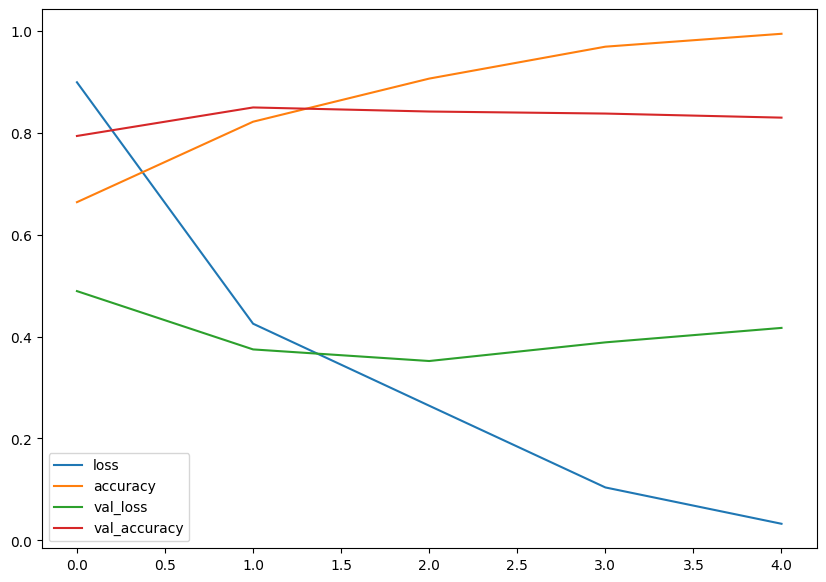

In [ ]:
import pandas as pd  # type: ignore
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [ ]:
# plot the validation and training curves separately 

def plot_loss_curves(history):
    """"
    Returns separate loss curves for training and validation metrics 
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot loss 
    plt.plot(epochs,loss,label='training_loss')
    plt.plot(epochs,val_loss,label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accuracy 
    plt.figure()
    plt.plot(epochs,accuracy,label='training_accuracy')
    plt.plot(epochs,val_accuracy,label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

> NOTE: when a models validation loss starts to increase its likely that the moel is overfitting the training dataset. This means its learning the patterns in the training dataset too well and thus the models ability to generalie to unseen data will be diminshed

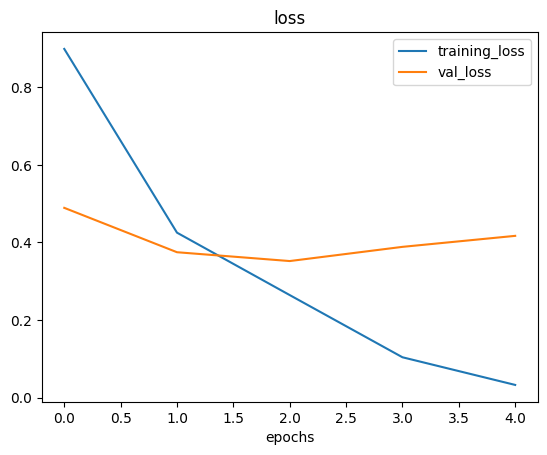

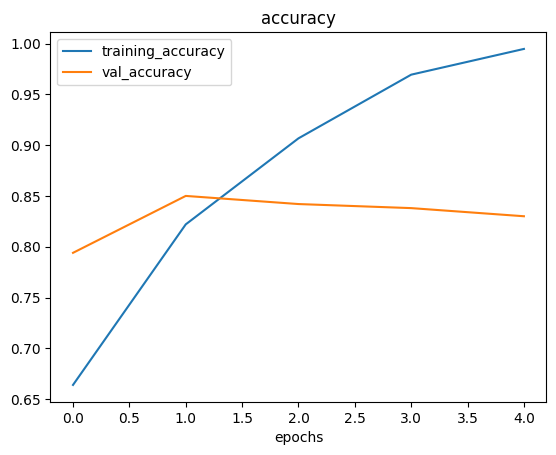

In [ ]:
# check out the loss and accuracy of model 4 
plot_loss_curves(history_4)

### 6. Adjust the model parameters 

Fitting  a machine learning model comes in 3 steps :
1. create a baseline 
2. beat the baseline by overfitting a larger model 
3. reduce overfitting 

Ways to induce overfitting :
* Increase the of Conv layers 
* Increase the number of Conv filters 
* Add another dense layer to the out put of our flattenend layer 

Reduce overfitting :
* Add data augmentation 
* Add regularization layers(such as MaxPool2D)
* Add more data..



In [ ]:
# create the model 
model_5 = Sequential([
    Conv2D(10,3,activation ='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation ='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation ='sigmoid')
])

In [ ]:
#  Compile the model 
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model 
history_5 = model_5.fit(train_data,
                        epochs =5,
                        steps_per_epoch =len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 71ms/step - loss: 0.5934 - accuracy: 0.6733 - val_loss: 0.5000 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 3s 66ms/step - loss: 0.4736 - accuracy: 0.7827 - val_loss: 0.3642 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 3s 65ms/step - loss: 0.4020 - accuracy: 0.8187 - val_loss: 0.3453 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 3s 65ms/step - loss: 0.3881 - accuracy: 0.8433 - val_loss: 0.3110 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 3s 63ms/step - loss: 0.3645 - accuracy: 0.8420 - val_loss: 0.2981 - val_accuracy: 0.8800


In [ ]:
# summary of model 5 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

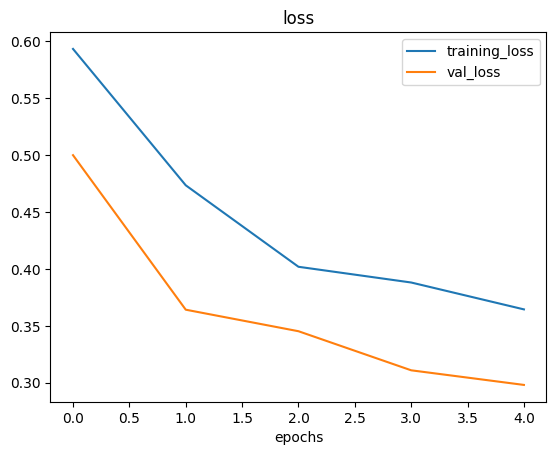

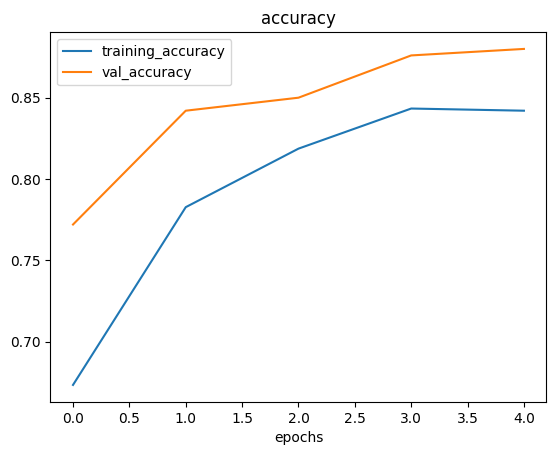

In [ ]:
plot_loss_curves(history_5)

### Opening our bags of tricks and finding data augmentaion 

In [ ]:
# Create ImageDataGenerator  training instance with data augmentation 
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range =0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augmnet it from training directory 
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size =32,
                                                                      class_mode ='binary',
                                                                      shuffle=False)

# Create Non-Augmented train data batches
print('non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print('Non-Augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size =(224,224),
                                             batch_size =32,
                                             class_mode ='binary') 

Augmented training data:
Found 1500 images belonging to 2 classes.
non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample augmented batches 

images , labels = train_data.next()
augmented_images , augmented_labels = train_data_augmented.next()

showing image number :13


(-0.5, 223.5, 223.5, -0.5)

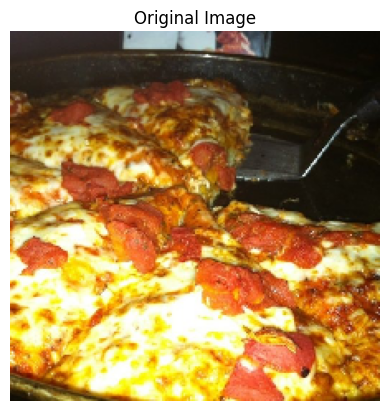

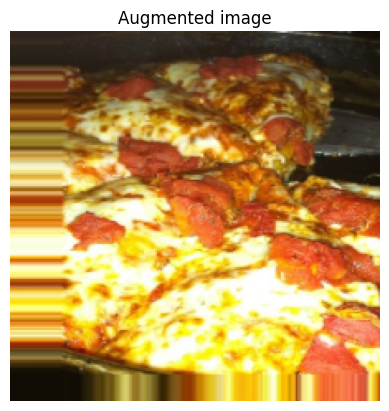

In [ ]:
# Show original image and augmented image
import random 

random_number = random.randint(0,32)

print(f'showing image number :{random_number}')
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)

lets build model on augmented data 

In [ ]:
# Create a model
model_6 = Sequential([
    Conv2D(10,3,activation ='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

# compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics =['accuracy'])

# Fit the model 
history_6 = model_6.fit(train_data_augmented,
                        epochs =5,
                        steps_per_epoch =len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps =len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6999 - accuracy: 0.4400 - val_loss: 0.6850 - val_accuracy: 0.5220
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.7247 - accuracy: 0.6047 - val_loss: 0.6697 - val_accuracy: 0.6900
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6890 - accuracy: 0.5827 - val_loss: 0.6682 - val_accuracy: 0.6120
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6779 - accuracy: 0.5940 - val_loss: 0.6432 - val_accuracy: 0.5760
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6577 - accuracy: 0.6227 - val_loss: 0.6432 - val_accuracy: 0.5560


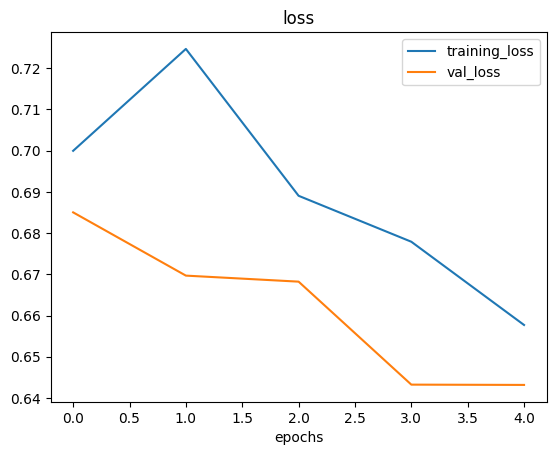

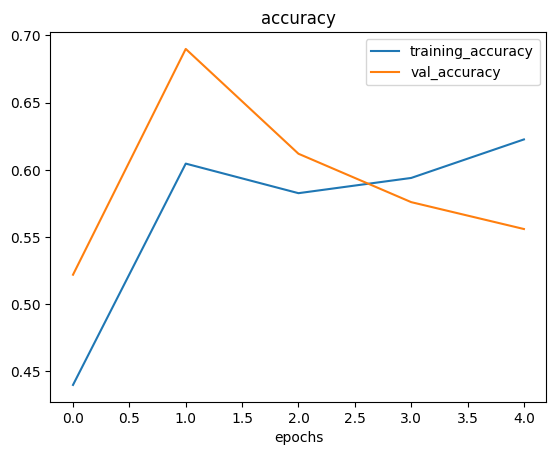

In [ ]:
# Check our models training curves 
plot_loss_curves(history_6)

Lets shuffle our training data and train another model on it and see what happens 

In [ ]:
# import data and augmented and shuffle from directory 
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode='binary',
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model 
model_7 = Sequential([
    Conv2D(10,3,activation ='relu',input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

# compile the model
model_7.compile(loss ='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch =len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps =len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6544 - accuracy: 0.6000 - val_loss: 0.5637 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6066 - accuracy: 0.6800 - val_loss: 0.4864 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.5644 - accuracy: 0.7307 - val_loss: 0.4440 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.5301 - accuracy: 0.7520 - val_loss: 0.3638 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4916 - accuracy: 0.7793 - val_loss: 0.4205 - val_accuracy: 0.8100


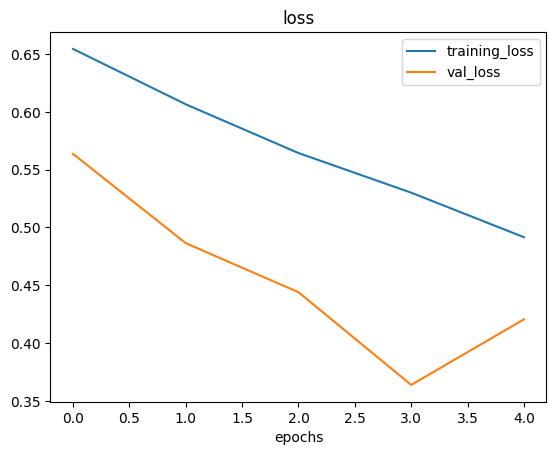

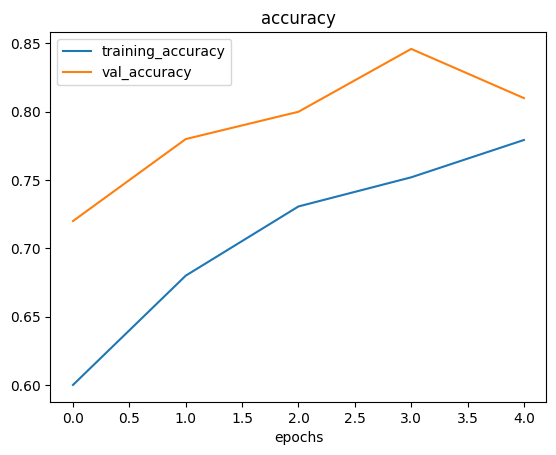

In [ ]:
# plot loss curves 
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline , there  are few things we could try to continue to imporve our model::

* Increase the number of model layers 
* Increase the number of filters in each convolutional layer 
* Train for longer 
* Find an ideal learning rate 
* get more data 
* Use **Transfer learning**

## Making a prediction with our trained model on our custom data 

In [ ]:
# Classes we are working with 
print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

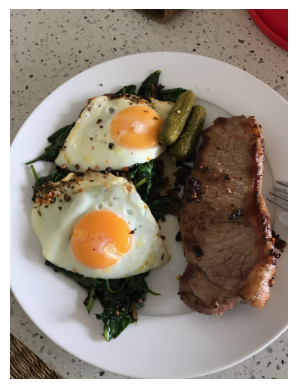

In [ ]:
# wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'

import matplotlib.image as mpimg

# url = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'
# steak_img = wget.download(url)

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255. # type: ignore
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.65049016, 0.6318627 , 0.5897058 ],
        [0.6318627 , 0.6083333 , 0.56127447],
        ...,
        [0.5215686 , 0.05098039, 0.09019607],
        [0.495098  , 0.04215686, 0.07058823],
        [0.52843136, 0.07745098, 0.10490195]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.63872546, 0.6230392 , 0.57598037],
        [0.6558823 , 0.6323529 , 0.58529407],
        ...,
        [0.53529406, 0.06862745, 0.09215686],
        [0.5299019 , 0.05931372, 0.09460784],
        [0.51421565, 0.05539215, 0.0867647 ]],

       [[0.65196073, 0.63627446, 0.58921564],
        [0.63921565, 0.6137254 , 0.56764704],
        [0.6563725 , 0.62696075, 0.5828431 ],
        ...,
        [0.53137255, 0.06470588, 0.08039215],
        [0.5274509 , 0.06862745, 0.09999999],
        [0.522549  , 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745095, 0.3102941 ],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 86ms/step


In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])] # type: ignore
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))


  # Add logic for multi class 
  if len(pred[0]) > 1:
    pred_class =class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]   # type: ignore

  # Get the predicted class
  # type: ignore

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 15ms/step


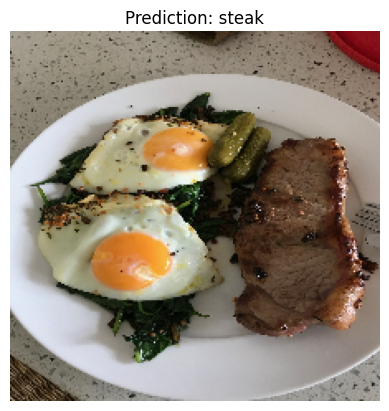

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg", class_names=['pizza' , 'steak']) # type: ignore

In [ ]:
# url = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg'
# pizza_img = wget.download(url)
pizza_img = '03-pizza-dad.jpeg'

1/1 [==============================] - 0s 15ms/step


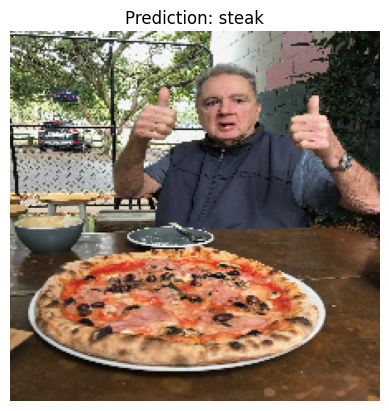

In [ ]:
pred_and_plot(model_7,pizza_img,class_names=['pizza' , 'steak']) # type: ignore

# Multi-Class Image Classification 

1. Become one with the data 
2. Preprocess the data 
3. create a model
4. fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model 
7. Repeat unitl satisfied 

In [ ]:
import zipfile

# only run once 
# url =  'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'
# zipfolder = wget.download(url)

# zip_ref =zipfile.ZipFile('10_food_classes_all_data.zip','r')
# zip_ref.extractall()
# zip_ref.close()



In [ ]:
import os 

# Walk through 0 cclasses of food image data 

for dirpath ,dirnames,filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} image in {dirpath} . ')

There are 2 directories and 0 image in 10_food_classes_all_data . 
There are 10 directories and 0 image in 10_food_classes_all_data\test . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\chicken_curry . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\chicken_wings . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\fried_rice . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\grilled_salmon . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\hamburger . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\ice_cream . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\pizza . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\ramen . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\steak . 
There are 0 directories and 250 image in 10_food_classes_all_data\test\sushi . 
There are 10 directori

In [ ]:
# Setup the train and test directories 
train_dir ='10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'


In [ ]:
# Lets get the class names 
import pathlib
import numpy as np 

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


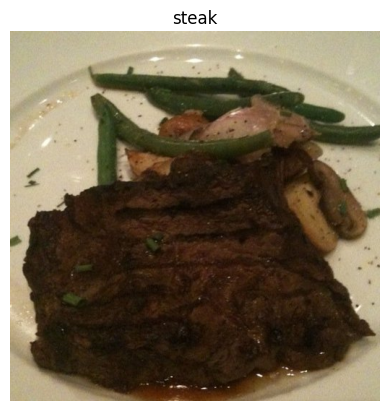

In [ ]:
import random 
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (Prepare it for model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from diretories and turn it into batches 
train_data  = train_datagen.flow_from_directory(train_dir,
                                                target_size =(224,224),
                                                batch_size =32,
                                                class_mode ='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size =(224,224),
                                             batch_size =32,
                                             class_mode ='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a Model (start with a baseline)

In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D , MaxPool2D,Flatten,Dense # type: ignore

# Create our model 
model_8 = Sequential([
    Conv2D(10,3,input_shape =(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3,activation ='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation ='relu'),
    Conv2D(10,3,activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation ='softmax') 
])

# Compile the model 
model_8.compile(loss='categorical_crossentropy',
                optimizer =tf.keras.optimizers.Adam(),
                metrics ='accuracy')


### 4. Fit the model

In [ ]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 19s 80ms/step - loss: 2.1543 - accuracy: 0.2083 - val_loss: 2.0267 - val_accuracy: 0.2656
Epoch 2/5
 93/235 [==========>...................] - ETA: 7s - loss: 1.9484 - accuracy: 0.3135

KeyboardInterrupt: 

In [ ]:
# summary of model 8
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

### 5. Evaluate the model 

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 2.7690 - accuracy: 0.2716


[2.7689828872680664, 0.27160000801086426]

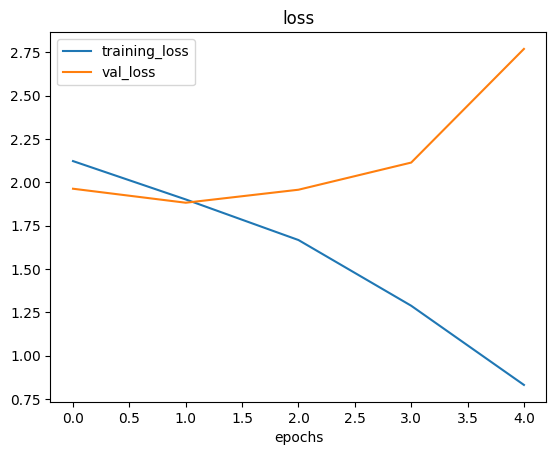

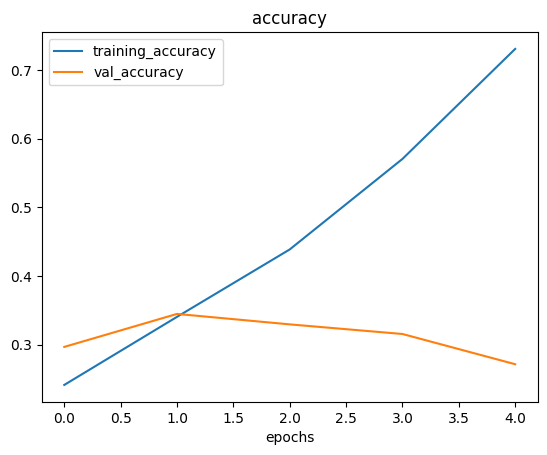

In [ ]:
# Check out the models loss curves 
plot_loss_curves(history_8)

### 6.Adjust the model hyperparameters (to beat the baseline and reduce overfitting)

Due to its performance on training data , its clear our model is learning something 
However its not generalizing well to unseen data 
so , lets try and fi overfitting by..

* **Get more data** - having more data gives model more opportunity to learn diverse patterns 
* **Simplify the model** - if our current model is overfitting the data it may be too complicated of model , one way to simplify a model is to reduce numer of layers or reduce hidden units in layers 
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it 
* **Use transfer learning** - transfer training leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset 

In [ ]:
# How about we try to simlify our model 
# lets remove two layers of 2 conv layers

model_9 = Sequential([
    Conv2D(10,3,activation ='relu',input_shape =(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_9.compile(loss ='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# fit the model 
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data =test_data,
                        validation_steps =len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 121ms/step - loss: 2.1140 - accuracy: 0.2492 - val_loss: 1.9522 - val_accuracy: 0.3036
Epoch 2/5
235/235 [==============================] - 27s 117ms/step - loss: 1.8306 - accuracy: 0.3744 - val_loss: 1.8700 - val_accuracy: 0.3460
Epoch 3/5
235/235 [==============================] - 27s 117ms/step - loss: 1.5574 - accuracy: 0.4855 - val_loss: 1.9137 - val_accuracy: 0.3440
Epoch 4/5
235/235 [==============================] - 27s 117ms/step - loss: 1.1276 - accuracy: 0.6456 - val_loss: 2.0195 - val_accuracy: 0.3384
Epoch 5/5
235/235 [==============================] - 27s 116ms/step - loss: 0.6661 - accuracy: 0.8040 - val_loss: 2.3684 - val_accuracy: 0.3216


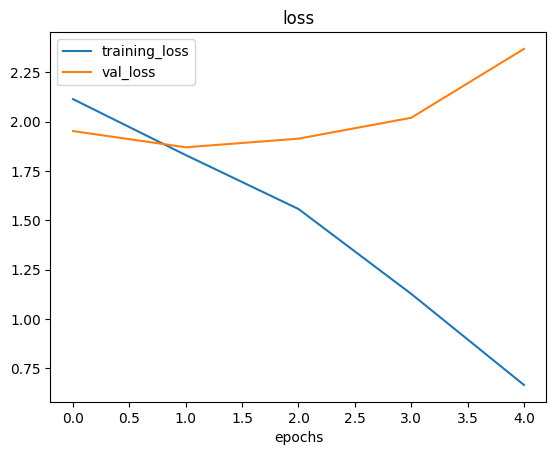

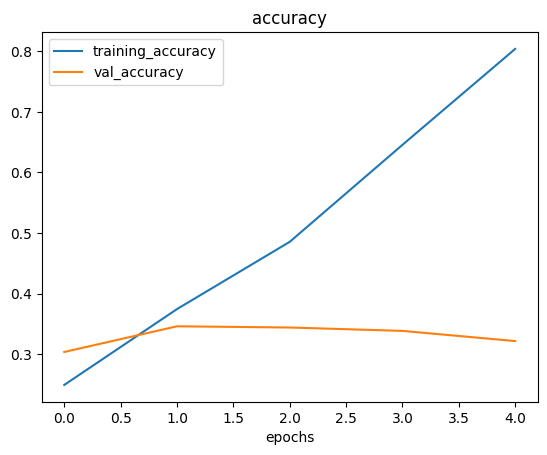

In [ ]:
# Check out the loss curves 
plot_loss_curves(history_9)

### Trying to reduce overfitting using data augmentation 

Lets try and improve our models results by using training data 

ideally we want to:
* Reduce overfitting 
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance 

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                   rotation_range =0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip =True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size = 32,
                                                                   class_mode= 'categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Lets create another model now lets fit in our augmented training data 
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model 
model_10.compile(loss ='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics= ['accuracy'])

In [ ]:
# fit the model 
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps = len(test_data)
                          )

Epoch 1/5
235/235 [==============================] - 95s 403ms/step - loss: 2.1834 - accuracy: 0.1939 - val_loss: 2.0328 - val_accuracy: 0.2704
Epoch 2/5
235/235 [==============================] - 95s 402ms/step - loss: 2.0966 - accuracy: 0.2433 - val_loss: 1.9784 - val_accuracy: 0.2828
Epoch 3/5
235/235 [==============================] - 95s 403ms/step - loss: 2.0541 - accuracy: 0.2709 - val_loss: 1.9042 - val_accuracy: 0.3176
Epoch 4/5
235/235 [==============================] - 95s 403ms/step - loss: 2.0003 - accuracy: 0.2943 - val_loss: 1.8650 - val_accuracy: 0.3556
Epoch 5/5
235/235 [==============================] - 96s 407ms/step - loss: 1.9513 - accuracy: 0.3207 - val_loss: 1.8687 - val_accuracy: 0.3728


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 92ms/step - loss: 2.7690 - accuracy: 0.2716


[2.7689833641052246, 0.27160000801086426]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 1.8686 - accuracy: 0.3728


[1.8686497211456299, 0.3728000223636627]

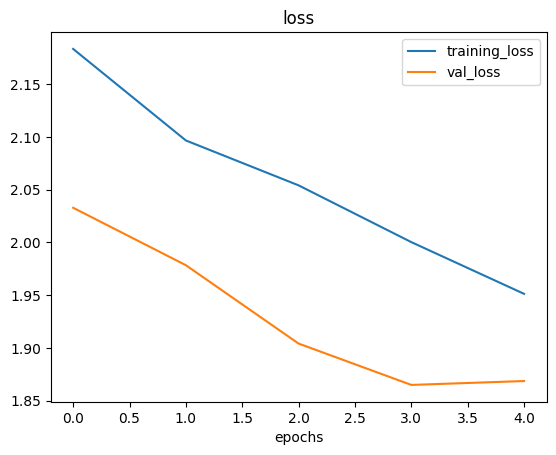

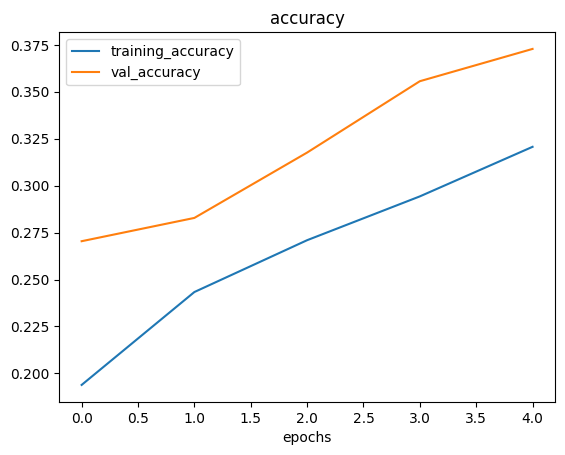

In [ ]:
# lets check out our loss curves 
plot_loss_curves(history_10)

# Repeat until satisfied 

We could keep going here ... Continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.
How?

By running lots of experiments , namely 
- restructuring our models architecture 
- adjust the learning rate 
- try differnt methods of data augmentation 
- training for longer 
- try **transfer learning**


### Making a prediction with our trained model 

Lets use our trained model to make some predicctions on our own custom images !

In [ ]:
# Lets Remind ourselves of our class names 
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# url_1 = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg'
# url_2 ='https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg'

# hamburger_img = wget.download(url_1)
# sushi_img = wget.download(url_2)

1/1 [==============================] - 0s 22ms/step


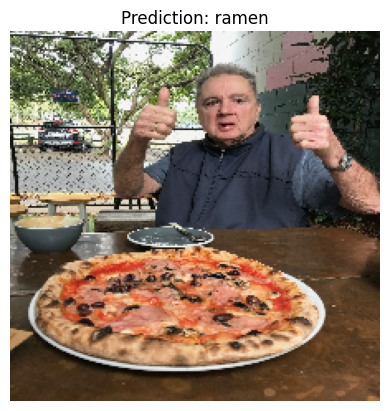

In [ ]:
# Make a prediction 
pred_and_plot(model=model_10,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 17ms/step


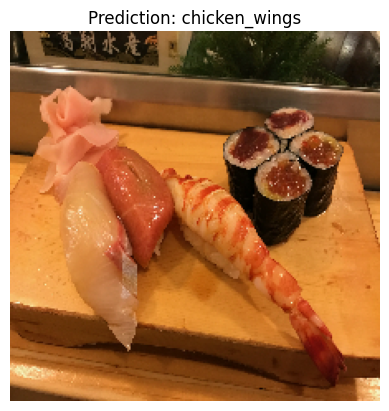

In [ ]:
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 17ms/step


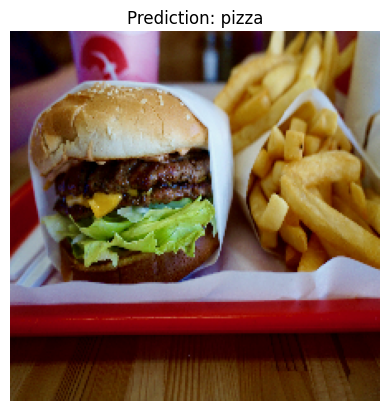

In [ ]:
pred_and_plot(model=model_10,
              filename='03-hamburger.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 48ms/step


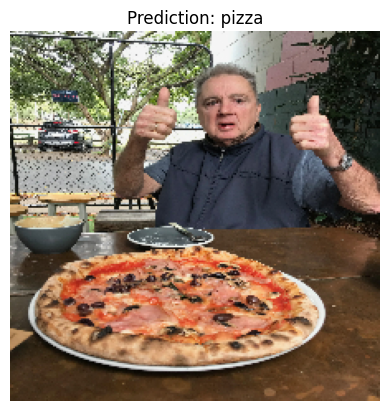

In [ ]:
# binary classification 

pred_and_plot(model=model_3,
              filename='03-pizza-dad.jpeg',
              class_names=['pizza','steak']) # type: ignore

1/1 [==============================] - 0s 19ms/step


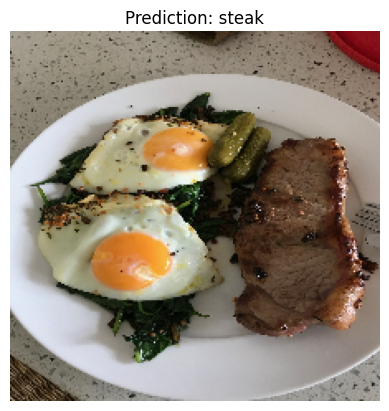

In [ ]:
pred_and_plot(model=model_3,
              filename='03-steak.jpeg',
              class_names=['pizza','steak']) # type: ignore

### Saving and loading our model 

In [ ]:
model_10.save('saved_trained_model_10')

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


INFO:tensorflow:Assets written to: saved_trained_model_10\assets


In [ ]:
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data) # type: ignore

79/79 [==============================] - 5s 55ms/step - loss: 1.8686 - accuracy: 0.3728


[1.8686497211456299, 0.3728000223636627]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 5s 56ms/step - loss: 1.8686 - accuracy: 0.3728


[1.8686494827270508, 0.3728000223636627]